In [1]:
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

import pandas as pd
import matplotlib.pyplot as plt
import subprocess
import numpy as np

Loads the station data for gravity model to use

In [2]:
df_citty = pd.read_csv('Average_status.csv')
display(df_citty)

df_citty['status_3_ratio_mean'] = df_citty['status_3_ratio_mean']*df_citty['ratios_length']*17


#sort by status_3_ratio_mean
df_citty = df_citty.sort_values(by='status_3_ratio_mean', ascending=True)
display(df_citty[['Unnamed: 0','longitude', 'latitude', 'status_3_ratio_mean']])
df_citty[['Unnamed: 0','longitude', 'latitude', 'status_3_ratio_mean']].to_csv('AllStation.csv', index=False)



,Unnamed: 0,slug,status_3_ratio_mean,status_3_ratio_var,latitude,longitude,ratios,ratios_length,minCapacity,maxCapacity
0,329,x5623z,0.759760,0.182567,55.732861,12.386630,[0.7597597597597597],1,50.0,50.0
1,47,5nykwy,0.579191,0.243785,55.858522,9.851593,[0.5791907514450867],1,75.0,75.0
2,196,jq8xwm,0.557396,0.246763,55.723784,9.583650,[0.5573961735884274],1,50.0,50.0
3,12,2j72qy,0.540725,0.150718,55.614600,12.355200,"[0.5385325334563913, 0.5429164743885556]",2,43.0,50.0
4,214,kj9rwe,0.536461,0.119460,55.626754,12.575313,"[0.41407338597306087, 0.6588481189038551]",2,43.0,50.0
...,...,...,...,...,...,...,...,...,...,...
395,90,7nyr93,0.009227,0.009144,56.781975,8.836123,[0.00922722029988466],1,50.0,50.0
396,349,y67jq,0.008146,0.002712,56.964766,9.241929,"[0.0349002849002849, 0.002849002849002849, 0.0...",5,11.0,150.0
397,46,5np96k,0.007568,0.003728,57.061677,10.182387,"[0.0122537241710716, 0.0028832292167227293]",2,90.0,90.0
398,31,39xd56,0.006498,0.003208,55.414030,11.342991,"[0.003716608594657375, 0.0, 0.0111394755163611...",4,50.0,60.0


,Unnamed: 0,longitude,latitude,status_3_ratio_mean
399,114,10.648394,55.501504,0.078868
395,90,8.836123,56.781975,0.156863
397,46,10.182387,57.061677,0.257328
394,267,9.129680,55.130120,0.369053
398,31,11.342991,55.414030,0.441866
...,...,...,...,...
76,118,11.361842,55.387910,125.194001
64,308,9.716938,55.534483,128.493454
72,255,10.419778,55.352714,138.276680
5,275,12.161393,55.489341,139.302812


Deffiens the goals

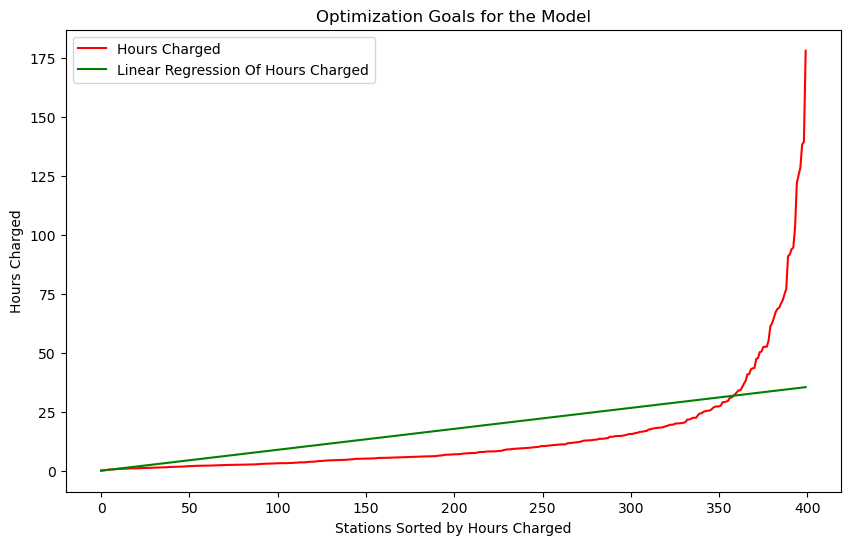

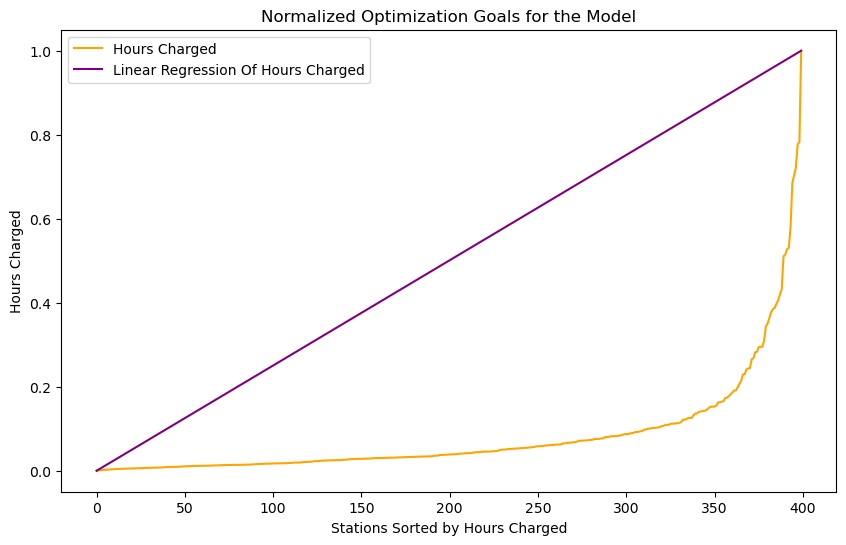

In [3]:
X = np.arange(len(df_citty)).reshape(-1, 1)  # Element numbers as X
y_original = df_citty['status_3_ratio_mean'].values.reshape(-1, 1)  # status_3_ratio_mean as Y, reshaped for scaler

# Normalize X and y
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y_original)

# Fit the model
model = LinearRegression(fit_intercept=False)
model.fit(X, y_original)

# Predict using the scaled features
y_lin = model.predict(X)
y_scaled_lin = scaler_y.fit_transform(y_lin)

# Plotting the results (optional)
plt.figure(figsize=(10, 6))
plt.plot(X, y_original, color='red', label='Hours Charged')
plt.plot(X, y_lin, color='green', label='Linear Regression Of Hours Charged')

plt.title('Optimization Goals for the Model')
plt.xlabel('Stations Sorted by Hours Charged')
plt.ylabel('Hours Charged')
plt.legend()
plt.show()

# Plotting the results (optional)
plt.figure(figsize=(10, 6))
plt.plot(X, y_scaled, color='orange', label='Hours Charged')
plt.plot(X, y_scaled_lin, color='purple', label='Linear Regression Of Hours Charged')

plt.title('Normalized Optimization Goals for the Model')
plt.xlabel('Stations Sorted by Hours Charged')
plt.ylabel('Hours Charged')
plt.legend()
plt.show()

Calculates the restults of the gravity model

C++ program output:
 Time taken: 13798 milliseconds



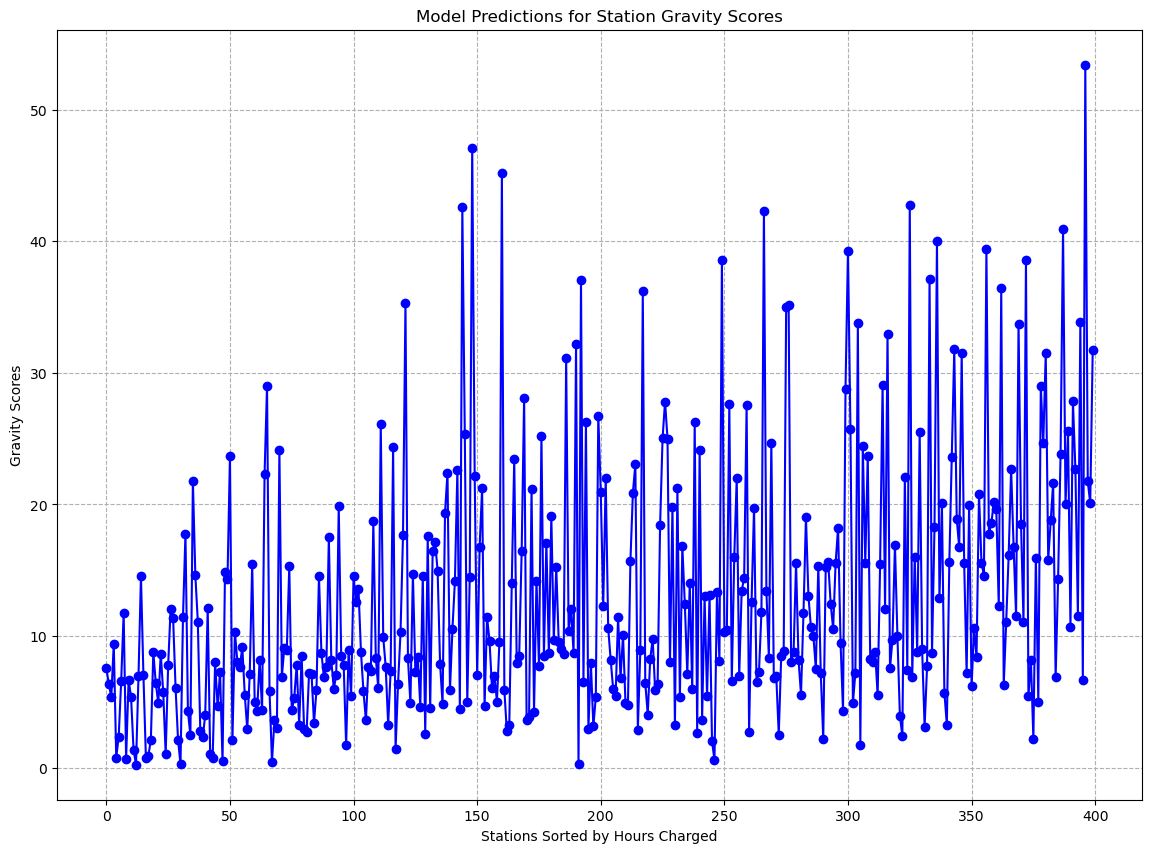

Mean Squared Error (MSE): 466.77970422944895
Root Mean Squared Error (RMSE): 21.605085147470465
NRMSE: 0.12144726734868312


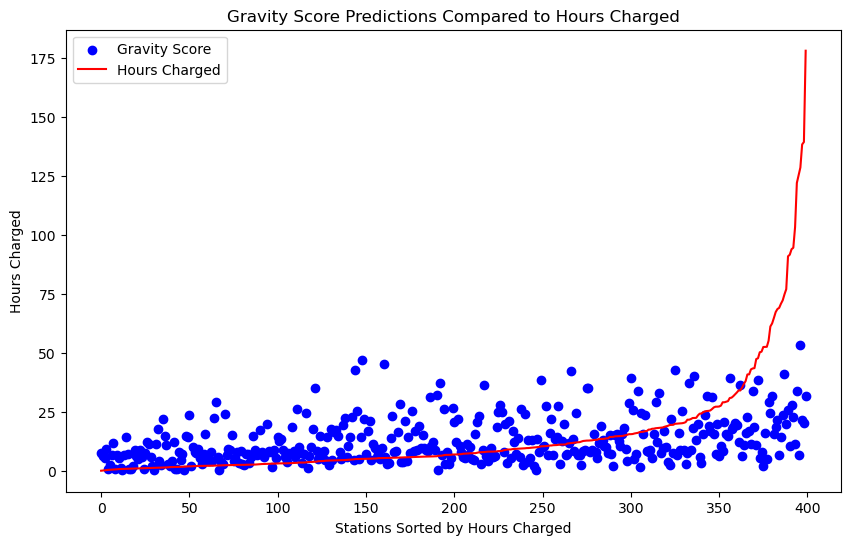

Mean Squared Error (MSE): 148.34317836260436
Root Mean Squared Error (RMSE): 12.17962143757368
NRMSE: 0.34392440231590166


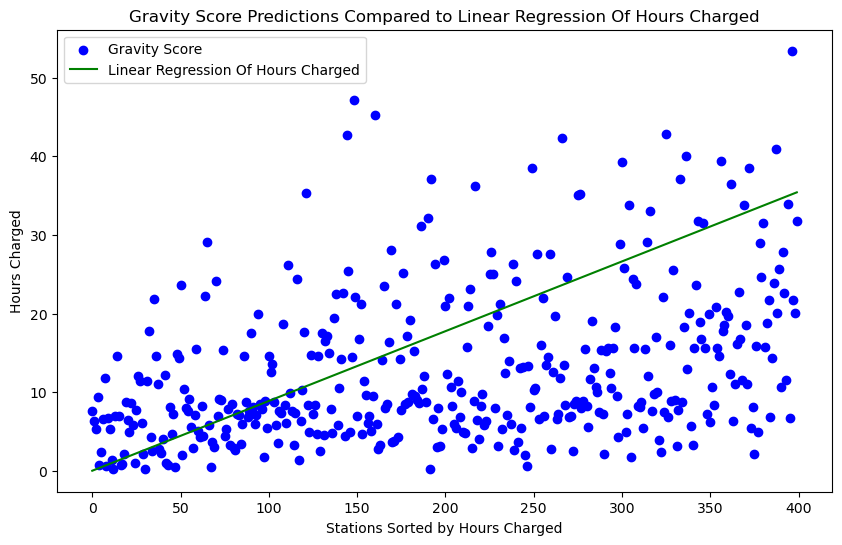

,longitude,latitude,gravity,traffic,apartments,cinemas,clinics,colleges,communityCentres,conferenceCentres,...,placesOfWorship,restaurants,shopMalls,shopSupermarkets,sportsCentres,sportsHalls,stadiums,substationMinorDistributions,theatres,universities
0,10.64840,55.5015,7.554550,0,0.000000,0.0,0.0,0.000000,0.000028,0,...,2.349290,0.000000,0.0,0.002128,0,0.000000,0.0,0.00000,0.0,0
1,8.83612,56.7820,6.355940,0,0.000000,0.0,0.0,0.000000,0.000000,0,...,0.079650,0.000000,0.0,0.000028,0,0.000000,0.0,0.00000,0.0,0
2,10.18240,57.0617,5.350960,0,0.000000,0.0,0.0,0.000000,0.000000,0,...,0.000000,0.000000,0.0,0.002128,0,0.000000,0.0,0.00000,0.0,0
3,9.12968,55.1301,9.409690,0,0.000000,0.0,0.0,0.000000,0.000000,0,...,0.093145,2.359100,0.0,0.002128,0,0.000000,0.0,0.00000,0.0,0
4,11.34300,55.4140,0.751763,0,0.002010,0.0,0.0,0.069046,0.000000,0,...,0.000000,0.227025,0.0,0.000150,0,0.000000,0.0,0.00000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,11.36180,55.3879,6.658440,0,0.000000,0.0,0.0,0.000000,0.000004,0,...,0.028682,0.000000,0.0,0.000094,0,0.008124,0.0,0.00000,0.0,0
396,9.71694,55.5345,53.429600,0,0.000000,0.0,0.0,0.000000,0.000000,0,...,0.024631,0.000000,0.0,0.000441,0,0.000000,0.0,0.00000,0.0,0
397,10.41980,55.3527,21.748500,0,0.002587,0.0,0.0,0.000000,0.000000,0,...,0.000000,0.000000,0.0,0.000000,0,0.000000,0.0,2.76003,0.0,0
398,12.16140,55.4893,20.089100,0,0.000000,0.0,0.0,0.739042,0.000000,0,...,0.000000,0.000000,0.0,0.000000,0,0.000000,0.0,0.00000,0.0,0


longitude                        4260.222930
latitude                        22338.227800
gravity                          5184.319636
traffic                             0.000000
apartments                         15.523857
cinemas                             0.642533
clinics                            80.376644
colleges                           39.513138
communityCentres                    0.007376
conferenceCentres                   0.000000
dentists                           80.268887
eventsVenues                        5.999973
fastFoods                        1485.197006
hospitals                          10.217150
hotels                              3.623629
leisureFitnessCentres              11.675223
leisureStadiums                     0.205531
motorwayLinks                     766.718710
motorways                          31.300507
parkings                         1657.411731
placesOfWorship                    98.089361
restaurants                       294.237569
shopMalls 

C++ program output:
 Time taken: 11568 milliseconds



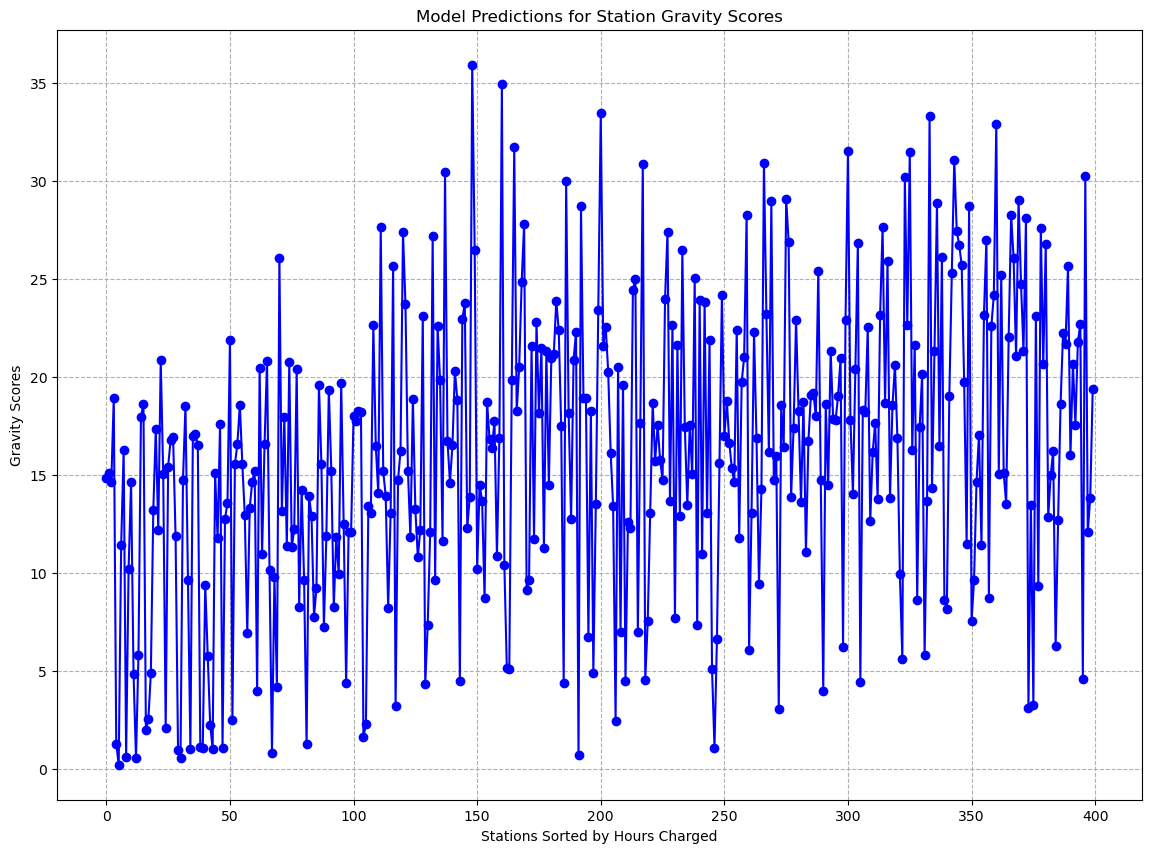

Mean Squared Error (MSE): 515.8884116794457
Root Mean Squared Error (RMSE): 22.713177049445232
NRMSE: 0.12767611266669365


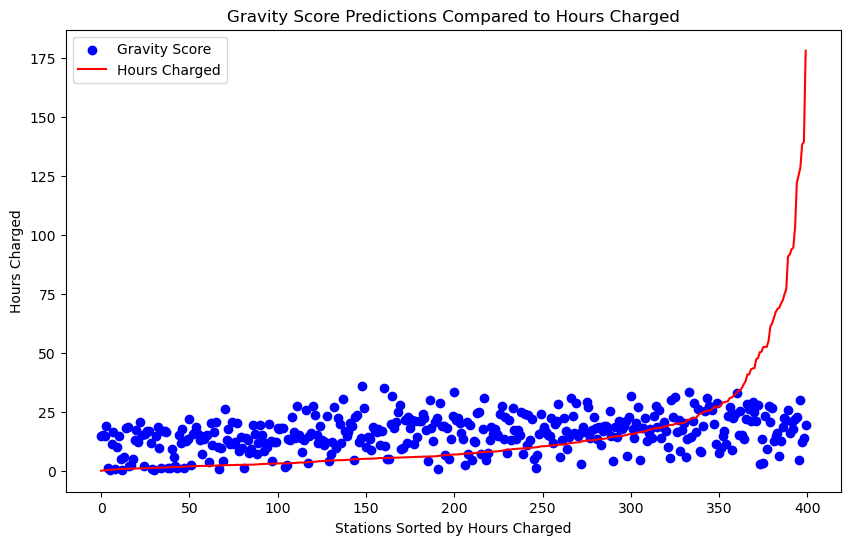

Mean Squared Error (MSE): 111.5158839884116
Root Mean Squared Error (RMSE): 10.560108142836967
NRMSE: 0.2981930842458107


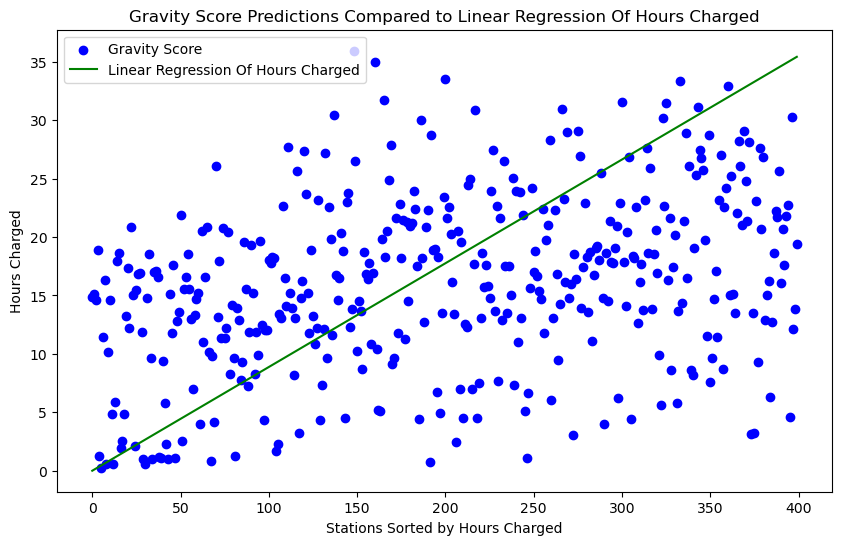

In [4]:
def nrmse(y_true, rmse_value):
    """Calculate the Normalized Root Mean Square Error."""
    range_value = np.max(y_true) - np.min(y_true)
    return rmse_value / range_value

weights = {
    "traffic_weight": 0,
    "apartments_weight": 0.0009170220089808314,
    "cinemas_weight": 0.0003695260891993867,
    "clinics_weight": 0.06816398784563084,
    "colleges_weight": 0.04516284488369832,
    "communityCentres_weight": 3.752127410133192e-06,
    "conferenceCentres_weight": 0,
    "dentists_weight": 0.04454496428452166,
    "eventsVenues_weight": 0.00464102768317852,
    "fastFoods_weight": 0.1784694398954507,
    "hospitals_weight": 0.012237558734649497,
    "hotels_weight": 0.0030296000484235936,
    "leisureFitnessCentres_weight": 0.0029541970112504264,
    "leisureStadiums_weight": 0.0007992050029449315,
    "motorwayLinks_weight": 0.10788956583509418,
    "motorways_weight": 0.026636366560840775,
    "parkings_weight": 0.03238725958418013,
    "placesOfWorship_weight": 0.02349285891361788,
    "restaurants_weight": 0.02359104950734122,
    "shopMalls_weight": 0.047809737636703376,
    "shopSupermarkets_weight": 2.1277026279482327e-05,
    "sportsCentres_weight": 0,
    "sportsHalls_weight": 0.003479494421348886,
    "stadiums_weight": 0.10188558996882979,
    "substationMinorDistributions_weight": 0.05602740409259743,
    "theatres_weight": 0.005573301139133856,
    "universities_weight": 0
}



with open("weights_float.txt", "w") as file:
    for name, value in weights.items():
        file.write(f"{name} {float(value)}\n")


# Define the path to the compiled executable
executable_path = './gravityscore'

# The CSV file name to pass as an argument
csv_file_name = 'AllStation.csv'

# Run the compiled C++ program with the CSV file name as an argument
result = subprocess.run([executable_path, csv_file_name], stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)

# Process the result
if result.returncode == 0:
    print("C++ program output:\n", result.stdout)
else:
    print("Error running C++ program:\n", result.stderr)

df_gravity = pd.read_csv('gravityScoresWithDetails.csv')
#change all gravity that a negative to zero
df_gravity['gravity'] = df_gravity['gravity'].apply(lambda x: 0 if x < 0 else x)

#plot df_gravity where x asis the the index and y axis the gravity
plt.figure(figsize=(14, 10))
plt.plot(df_gravity.index, df_gravity['gravity'], marker='o', linestyle='-', color='blue')
plt.xlabel('Stations Sorted by Hours Charged')
plt.ylabel('Gravity Scores')
plt.title('Model Predictions for Station Gravity Scores')
plt.grid(True, which="both", ls="--")
plt.show()

X = np.arange(len(df_citty)).reshape(-1, 1)  # Element numbers as X
y = df_gravity['gravity'].values.reshape(-1, 1)
#y = df_reordered_sorted['status_3_ratio_mean'].values.reshape(-1, 1)  # status_3_ratio_mean as Y, reshaped for scaler


scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_gravity_scaled = scaler_y.fit_transform(y)


# Calculate MSE on the scaled predictions
mse = mean_squared_error(y_original, y)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
nrmse_value = nrmse(y_original, rmse)
print(f"NRMSE: {nrmse_value}")

# Plotting the results (optional)
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Gravity Score')
plt.plot(X, y_original, color='red', label='Hours Charged')
plt.title('Gravity Score Predictions Compared to Hours Charged')
plt.xlabel('Stations Sorted by Hours Charged')
plt.ylabel('Hours Charged')
plt.legend()
plt.show()


# Calculate MSE on the scaled predictions
mse = mean_squared_error(y_lin, y)
rmse = np.sqrt(mse)
nrmse_value = nrmse(y_lin, rmse)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"NRMSE: {nrmse_value}")

# Plotting the results (optional)
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Gravity Score')
plt.plot(X, y_lin, color='green', label='Linear Regression Of Hours Charged')
plt.title('Gravity Score Predictions Compared to Linear Regression Of Hours Charged')
plt.xlabel('Stations Sorted by Hours Charged')
plt.ylabel('Hours Charged')
plt.legend()
plt.show()

weights_all_names= {
    "traffic_weight": 0,
    "apartments_weight": 0.0009170220089808314,
    "cinemas_weight": 0.0003695260891993867,
    "clinics_weight": 0.06816398784563084,
    "colleges_weight": 0.04516284488369832,
    "communityCentres_weight": 3.752127410133192e-06,
    "conferenceCentres_weight": 0,
    "dentists_weight": 0.04454496428452166,
    "eventsVenues_weight": 0.00464102768317852,
    "fastFoods_weight": 0.1784694398954507,
    "hospitals_weight": 0.012237558734649497,
    "hotels_weight": 0.0030296000484235936,
    "leisureFitnessCentres_weight": 0.0029541970112504264,
    "leisureStadiums_weight": 0.0007992050029449315,
    "motorwayLinks_weight": 0.10788956583509418,
    "motorways_weight": 0.026636366560840775,
    "parkings_weight": 0.03238725958418013,
    "placesOfWorship_weight": 0.02349285891361788,
    "restaurants_weight": 0.02359104950734122,
    "shopMalls_weight": 0.047809737636703376,
    "shopSupermarkets_weight": 2.1277026279482327e-05,
    "sportsCentres_weight": 0,
    "sportsHalls_weight": 0.003479494421348886,
    "stadiums_weight": 0.10188558996882979,
    "substationMinorDistributions_weight": 0.05602740409259743,
    "theatres_weight": 0.005573301139133856,
    "universities_weight": 0
}

df_gravity = pd.read_csv('gravityScoresWithDetails.csv')
#change all gravity that a negative to zero
df_gravity['gravity'] = df_gravity['gravity'].apply(lambda x: 0 if x < 0 else x)

# Extracting names and removing '_weight' suffix
new_names = [name.replace('_weight', '') for name in weights_all_names.keys()]

# Generating new column names for df_gravity
# This includes keeping the original names for columns not being replaced
new_column_names = df_gravity.columns[:3].tolist() + new_names[:len(df_gravity.columns) - 3]

# Renaming the columns in df_gravity
df_gravity.columns = new_column_names

display(df_gravity)
#display the sum of each column
display(df_gravity.sum())
df_gravity.to_csv('gravityScoresWithDetails.csv')



weights = {
    "traffic_weight": 0,
    "apartments_weight": 0.013020803620594542,
    "cinemas_weight": 8.914836506796038e-05,
    "clinics_weight": 0.05044043248665535,
    "colleges_weight": 0.023629078699960445,
    "communityCentres_weight": 0.06052956661123591,
    "conferenceCentres_weight": 0.002228864000721831,
    "dentists_weight": 0.012060727058256915,
    "eventsVenues_weight": 0.0078254979360184,
    "fastFoods_weight": 0.08438839739569119,
    "hospitals_weight": 0.006203608183887592,
    "hotels_weight": 0.0003179888631597091,
    "leisureFitnessCentres_weight": 0.005110500724733416,
    "leisureStadiums_weight": 0.0031516632035784825,
    "motorwayLinks_weight": 0.044317712816342156,
    "motorways_weight": 0.029215833567085046,
    "parkings_weight": 0.08162039103927429,
    "placesOfWorship_weight": 0.0010795097351406447,
    "restaurants_weight": 0.002205968749757865,
    "shopMalls_weight": 0,
    "shopSupermarkets_weight": 0.011643741100199712,
    "sportsCentres_weight": 0.0011138701504398237,
    "sportsHalls_weight": 0.03861830014075491,
    "stadiums_weight": 0.005513851266402256,
    "substationMinorDistributions_weight": 0.053280480432216046,
    "theatres_weight": 0.006458047190017242,
    "universities_weight": 0
}

with open("weights_float.txt", "w") as file:
    for name, value in weights.items():
        file.write(f"{name} {float(value)}\n")


# Define the path to the compiled executable
executable_path = './gravityscore'

# The CSV file name to pass as an argument
csv_file_name = 'AllStation.csv'

# Run the compiled C++ program with the CSV file name as an argument
result = subprocess.run([executable_path, csv_file_name], stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)

# Process the result
if result.returncode == 0:
    print("C++ program output:\n", result.stdout)
else:
    print("Error running C++ program:\n", result.stderr)

df_gravity = pd.read_csv('gravityScoresWithDetails.csv')
#change all gravity that a negative to zero
df_gravity['gravity'] = df_gravity['gravity'].apply(lambda x: 0 if x < 0 else x)

#plot df_gravity where x asis the the index and y axis the gravity
plt.figure(figsize=(14, 10))
plt.plot(df_gravity.index, df_gravity['gravity'], marker='o', linestyle='-', color='blue')
plt.xlabel('Stations Sorted by Hours Charged')
plt.ylabel('Gravity Scores')
plt.title('Model Predictions for Station Gravity Scores')
plt.grid(True, which="both", ls="--")
plt.show()

X = np.arange(len(df_citty)).reshape(-1, 1)  # Element numbers as X
y = df_gravity['gravity'].values.reshape(-1, 1)
#y = df_reordered_sorted['status_3_ratio_mean'].values.reshape(-1, 1)  # status_3_ratio_mean as Y, reshaped for scaler


scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_gravity_scaled = scaler_y.fit_transform(y)


# Calculate MSE on the scaled predictions
mse = mean_squared_error(y_original, y)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
nrmse_value = nrmse(y_original, rmse)
print(f"NRMSE: {nrmse_value}")

# Plotting the results (optional)
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Gravity Score')
plt.plot(X, y_original, color='red', label='Hours Charged')
plt.title('Gravity Score Predictions Compared to Hours Charged')
plt.xlabel('Stations Sorted by Hours Charged')
plt.ylabel('Hours Charged')
plt.legend()
plt.show()


# Calculate MSE on the scaled predictions
mse = mean_squared_error(y_lin, y)
rmse = np.sqrt(mse)
nrmse_value = nrmse(y_lin, rmse)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"NRMSE: {nrmse_value}")

# Plotting the results (optional)
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Gravity Score')
plt.plot(X, y_lin, color='green', label='Linear Regression Of Hours Charged')
plt.title('Gravity Score Predictions Compared to Linear Regression Of Hours Charged')
plt.xlabel('Stations Sorted by Hours Charged')
plt.ylabel('Hours Charged')
plt.legend()
plt.show()
